In [ ]:
# =========================
# Cell 1: Import Libraries
# =========================
import cv2
import numpy as np
import matplotlib.pyplot as plt

# To display the image correctly in matplotlib as grayscale
plt.rcParams['image.cmap'] = 'gray'


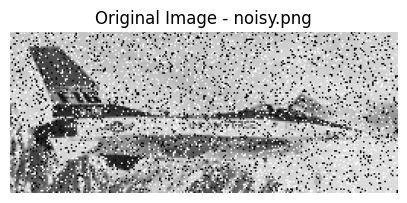

In [ ]:
# =========================
# Cell 2: Read and Display Input Image
# =========================

# Read the image in grayscale mode
img = cv2.imread('noisy.jpg', cv2.IMREAD_GRAYSCALE)

# Display the input image
plt.figure(figsize=(5,5))
plt.title("Original Image - noisy.png")
plt.imshow(img)
plt.axis('off')
plt.show()


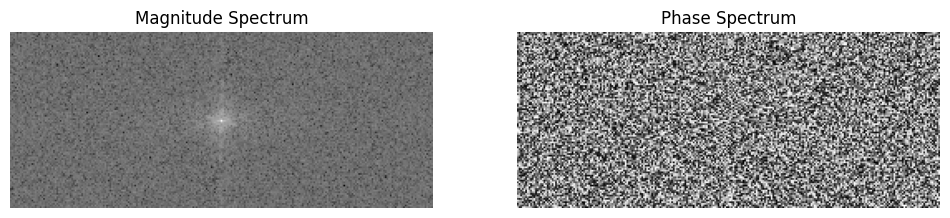

In [ ]:
# =========================
# Cell 3: Compute DFT and Display Magnitude & Phase
# =========================

# Compute 2D DFT
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift low-frequency components to the centre of the image
dft_shift = np.fft.fftshift(dft)

# Compute magnitude and phase
magnitude = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])
phase = np.arctan2(dft_shift[:,:,1], dft_shift[:,:,0])

# Display magnitude and phase (in logarithmic scale for better visualisation)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Magnitude Spectrum")
plt.imshow(np.log(1 + magnitude))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Phase Spectrum")
plt.imshow(phase)
plt.axis('off')

plt.show()


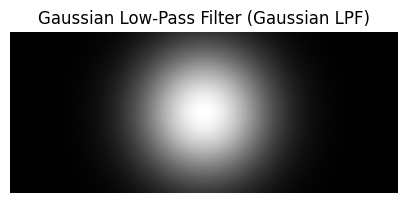

In [ ]:
# =========================
# Cell 4: Create Gaussian Low-Pass Filter and Apply
# =========================

# Get image dimensions
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2  # Image centre

# Define filter size (larger value removes less frequency components)
D0 = 30  # e.g., 30 pixels; can be adjusted

# Create a 2D Gaussian filter
u, v = np.meshgrid(np.arange(cols), np.arange(rows))
u = u - ccol
v = v - crow
H = np.exp(-(u**2 + v**2) / (2 * (D0**2)))

# Display the filter for inspection
plt.figure(figsize=(5,5))
plt.title("Gaussian Low-Pass Filter (Gaussian LPF)")
plt.imshow(H)
plt.axis('off')
plt.show()

# Apply the filter to the image in the frequency domain
filtered_shift = np.zeros_like(dft_shift)
filtered_shift[:,:,0] = dft_shift[:,:,0] * H
filtered_shift[:,:,1] = dft_shift[:,:,1] * H


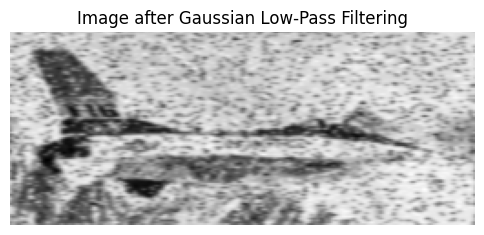

In [ ]:
# =========================
# Cell 5: Compute Inverse DFT and Display Filtered Image
# =========================

# Inverse shift of the filtered spectrum
f_ishift = np.fft.ifftshift(filtered_shift)

# Compute the inverse DFT
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Normalise for better visualisation
img_back_norm = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
img_back_uint8 = np.uint8(img_back_norm)

plt.figure(figsize=(6,6))
plt.title("Image after Gaussian Low-Pass Filtering")
plt.imshow(img_back_uint8)
plt.axis('off')
plt.show()


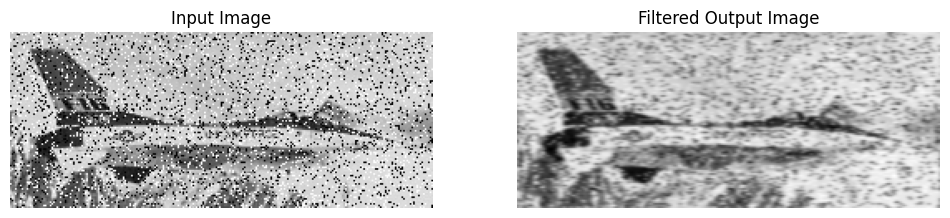

In [ ]:
# =========================
# Cell 6: Compare Input and Output Images
# =========================

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Filtered Output Image")
plt.imshow(img_back_uint8)
plt.axis('off')

plt.show()
